<div style = "text-align: left"><font size = 6 color = "#00008B" face = "verdana"><b>Final project on Telco Customer Churn</b></font></div>
<div style = "text-align: leftt"><font><i>By 'Moyosade Jacob</i></font></div>
<div style = "text-align: leftt"><font>19th Feb 2023</font></div>

# Experimentation

1. **Data Ingestion**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.options.display.max_columns = 200

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.9f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
pwd

'C:\\redoneproj\\Telco_customer_churn'

In [5]:
FILE_NAME = "telco-customer-churn.csv"
DATA_FOLDER = "data"

In [6]:
main_path = os.getcwd()

In [7]:
main_path

'C:\\redoneproj\\Telco_customer_churn'

In [8]:
file_path = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_NAME)
file_path

'C:\\redoneproj\\Telco_customer_churn\\data\\telco-customer-churn.csv'

In [9]:
telco_data =pd.read_csv(file_path)

In [10]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000000,151.65,Yes


In [11]:
telco_data.shape

(7043, 21)

### Data Inspection

In [12]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
telco_data['TotalCharges'] = (
    pd.to_numeric
    (telco_data
     ['TotalCharges'],
     errors='coerce')
 )


In [14]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##  Exploration Data Analysis

1. ## Model Building

In [15]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [16]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
X = telco_data[['customerID', 'gender', 'SeniorCitizen', 
                'Partner', 'Dependents',
                'tenure', 'PhoneService', 'MultipleLines',
                'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies', 
                'Contract', 'PaperlessBilling',
                 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',]]

In [18]:
telco_data_drop=telco_data.drop(["customerID"], axis = 1)

In [19]:
telco_data_drop.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000000,29.850000000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950000000,1889.500000000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000000,108.150000000,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000000,1840.750000000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700000000,151.650000000,Yes


In [20]:
y = telco_data_drop["Churn"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [22]:
X_train.shape, X_test.shape

((4718, 20), (2325, 20))

## Train Model

In [23]:
train_data, test_data = train_test_split( telco_data_drop, test_size=0.33, random_state=42)

In [24]:
train_data.shape, test_data.shape

((4718, 20), (2325, 20))

In [25]:
label = 'Churn'
print("Summary of class variable: \n", train_data[label].describe())

Summary of class variable: 
 count     4718
unique       2
top         No
freq      3477
Name: Churn, dtype: object


In [99]:
save_path = 'models'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "models\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    4718
Train Data Columns: 19
Label Column: Churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (Yes) vs negative (No) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to preproce

In [100]:
predictor.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.812000000,0.045613527,21.191591263,0.000000000,1.248186827,2,True,14
1,LightGBMXT,0.806000000,0.016632795,0.923899174,0.016632795,0.923899174,1,True,3
2,NeuralNetTorch,0.806000000,0.028980732,19.019505262,0.028980732,19.019505262,1,True,12
3,LightGBM,0.802000000,0.015632868,0.886930943,0.015632868,0.886930943,1,True,4
4,CatBoost,0.802000000,0.031246424,23.705529928,0.031246424,23.705529928,1,True,7
5,NeuralNetFastAI,0.800000000,0.040263414,14.067379475,0.040263414,14.067379475,1,True,10
6,XGBoost,0.798000000,0.008042336,1.219863415,0.008042336,1.219863415,1,True,11
7,ExtraTreesEntr,0.796000000,0.131509542,1.678898573,0.131509542,1.678898573,1,True,9
8,ExtraTreesGini,0.788000000,0.172188044,1.611361265,0.172188044,1.611361265,1,True,8
9,RandomForestGini,0.786000000,0.149634361,1.975958109,0.149634361,1.975958109,1,True,5


# Using input for prediction

In [101]:
test_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,predicted_Churn
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.800000000,24.800000000,Yes,Yes
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.250000000,996.450000000,No,No
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.350000000,1031.700000000,No,No
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.350000000,76.350000000,Yes,Yes
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.550000000,3260.100000000,No,No


In [102]:
test_data["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [103]:
test_data["MultipleLines"].unique()

array(['No phone service', 'Yes', 'No'], dtype=object)

In [104]:
test_data["tenure"].unique()

array([ 1, 41, 52, 67, 68, 23, 72, 70, 34, 28, 18, 15, 11, 37, 22, 46, 51,
        5, 45, 29, 50, 27, 60, 17, 33, 66, 69, 57,  8, 14, 25,  7, 13, 19,
       59,  9,  3, 10, 39, 54, 35, 12, 31, 53, 30, 48, 38, 65, 24, 40, 43,
       71, 61, 26, 42, 21, 56,  4,  6, 55,  2, 44, 62, 63, 49, 20, 16, 47,
       32, 64, 58, 36,  0], dtype=int64)

## Creating Sample Input

In [105]:
input_data_dict = {
    "gender": "female",
    "SeniorCitizen": 0,
    "Partner": "Yes", 
    "Dependents" : "Yes", 
    "tenure": 5,
    "PhoneService": "Yes",
    "MultipleLines": "Yes",
    "InternetService": "Yes",
    "OnlineSecurity": "No",
    "OnlineBackup": "No",
    "DeviceProtection": "Yes",
    "TechSupport": "Yes",
    "StreamingTV": "Yes",
    "StreamingMovies": "Yes",
    "Contract": "Two year",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 24.8,
    "TotalCharges": 24.8
}

In [106]:
input_data_dict

{'gender': 'female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 5,
 'PhoneService': 'Yes',
 'MultipleLines': 'Yes',
 'InternetService': 'Yes',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'No',
 'DeviceProtection': 'Yes',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'Yes',
 'Contract': 'Two year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Electronic check',
 'MonthlyCharges': 24.8,
 'TotalCharges': 24.8}

In [107]:
input_data=pd.DataFrame([input_data_dict])

In [108]:
input_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,female,0,Yes,Yes,5,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,24.800000000,24.800000000


In [109]:
save_model_predictor.predict(input_data)

0    No
Name: Churn, dtype: object

In [110]:
save_model_predictor.predict(input_data)[0]

'No'

## Model Evaluation 

## Features Importance

In [111]:
y_test = test_data[label]  # values to predict
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating


In [112]:
test_data_nolab.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predicted_Churn
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.800000000,24.800000000,Yes
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.250000000,996.450000000,No
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.350000000,1031.700000000,No
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.350000000,76.350000000,Yes
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.550000000,3260.100000000,No


In [113]:
save_model_predictor.feature_importance(train_data)

Computing feature importance via permutation shuffling for 19 features using 4718 rows with 5 shuffle sets...
	19.53s	= Expected runtime (3.91s per shuffle set)
	11.99s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
tenure,0.031920305,0.004507704,0.000046481,5,0.041201729,0.022638881
Contract,0.031538788,0.004256007,0.000038845,5,0.040301965,0.022775611
InternetService,0.025052989,0.002785404,0.000018037,5,0.030788174,0.019317803
OnlineSecurity,0.018906316,0.002860989,0.000061048,5,0.024797133,0.013015500
TotalCharges,0.013692242,0.001285778,0.000009223,5,0.016339677,0.011044808
PaymentMethod,0.010216193,0.001623907,0.000074093,5,0.013559840,0.006872547
PaperlessBilling,0.008774905,0.002310204,0.000526873,5,0.013531646,0.004018163
TechSupport,0.007248834,0.001479131,0.000196971,5,0.010294385,0.004203284
MonthlyCharges,0.006231454,0.001268188,0.000194961,5,0.008842670,0.003620238
MultipleLines,0.003518440,0.001147297,0.001183836,5,0.005880740,0.001156140


In [114]:
save_model_predictor.feature_importance(test_data)

These features in provided data are not utilized by the predictor and will be ignored: ['predicted_Churn']
Computing feature importance via permutation shuffling for 19 features using 2325 rows with 5 shuffle sets...
	14.39s	= Expected runtime (2.88s per shuffle set)
	7.02s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
tenure,0.032172043,0.004686001,0.000052516,5,0.041820584,0.022523502
Contract,0.025720430,0.005279997,0.000201644,5,0.036592017,0.014848843
InternetService,0.020215054,0.001216528,0.000001566,5,0.022719901,0.017710206
OnlineSecurity,0.016774194,0.003232967,0.000157692,5,0.023430917,0.010117470
TotalCharges,0.011870968,0.003227240,0.000595569,5,0.018515899,0.005226036
TechSupport,0.009204301,0.001682375,0.000128176,5,0.012668334,0.005740268
PaperlessBilling,0.007655914,0.002263690,0.000819330,5,0.012316883,0.002994945
MonthlyCharges,0.006279570,0.002226611,0.001616329,5,0.010864194,0.001694946
MultipleLines,0.004301075,0.001693335,0.002371521,5,0.007787675,0.000814475
PhoneService,0.002924731,0.000560792,0.000154543,5,0.004079409,0.001770054


In [115]:
save_model_predictor = TabularPredictor.load(save_path)

In [116]:
y_pred = save_model_predictor.predict(test_data_nolab)

In [117]:
y_pred_proba = save_model_predictor.predict_proba(test_data_nolab)

In [118]:
y_pred_proba[10:15]

,No,Yes
2892,0.759140909,0.240859106
4129,0.686842442,0.313157558
2622,0.829524159,0.170475855
3801,0.499354899,0.500645101
4357,0.852242529,0.147757456


In [119]:
y_pred[10:15]

2892     No
4129     No
2622     No
3801    Yes
4357     No
Name: Churn, dtype: object

In [120]:
y_test[10:15]

2892     No
4129     No
2622     No
3801    Yes
4357     No
Name: Churn, dtype: object

In [121]:
# print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred_proba) # , auxiliary_metrics=True)
# perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, as_multiclass=False)

Evaluation: accuracy on test data: 0.8008602150537635
Evaluations on test data:
{
    "accuracy": 0.8008602150537635,
    "balanced_accuracy": 0.6714926866069384,
    "mcc": 0.43917707755791546,
    "roc_auc": 0.8619134929005476,
    "f1": 0.5141657922350473,
    "precision": 0.7538461538461538,
    "recall": 0.39012738853503187
}


In [122]:
save_model_predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.811612903,0.802000000,0.024232149,0.031246424,23.705529928,0.024232149,0.031246424,23.705529928,1,True,7
1,NeuralNetFastAI,0.806881720,0.800000000,0.169280767,0.040263414,14.067379475,0.169280767,0.040263414,14.067379475,1,True,10
2,RandomForestGini,0.803870968,0.786000000,0.363774776,0.149634361,1.975958109,0.363774776,0.149634361,1.975958109,1,True,5
3,XGBoost,0.803010753,0.798000000,0.069006920,0.008042336,1.219863415,0.069006920,0.008042336,1.219863415,1,True,11
4,WeightedEnsemble_L2,0.800860215,0.812000000,0.239295006,0.045613527,21.191591263,0.005160570,0.000000000,1.248186827,2,True,14
5,NeuralNetTorch,0.800430108,0.806000000,0.216145992,0.028980732,19.019505262,0.216145992,0.028980732,19.019505262,1,True,12
6,RandomForestEntr,0.800430108,0.782000000,0.277503729,0.128719330,2.241361856,0.277503729,0.128719330,2.241361856,1,True,6
7,LightGBM,0.800000000,0.802000000,0.033979177,0.015632868,0.886930943,0.033979177,0.015632868,0.886930943,1,True,4
8,LightGBMXT,0.797849462,0.806000000,0.017988443,0.016632795,0.923899174,0.017988443,0.016632795,0.923899174,1,True,3
9,ExtraTreesGini,0.794408602,0.788000000,0.373341084,0.172188044,1.611361265,0.373341084,0.172188044,1.611361265,1,True,8


In [123]:
test_data["predicted_Churn"] = y_pred

In [124]:
test_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,predicted_Churn
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.800000000,24.800000000,Yes,Yes
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.250000000,996.450000000,No,No
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.350000000,1031.700000000,No,No
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.350000000,76.350000000,Yes,Yes
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.550000000,3260.100000000,No,No


# Maximizing predictive performance

In [125]:
time_limit = 60  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
metric = 'roc_auc'  # specify your evaluation metric here
predictor = TabularPredictor(label, eval_metric=metric).fit(train_data, time_limit=time_limit, presets='best_quality')


No path specified. Models will be saved in: "AutogluonModels\ag-20230227_100209\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels\ag-20230227_100209\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Train Data Rows:    4718
Train Data Columns: 19
Label Column: Churn
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification

In [126]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.861999820,0.838568611,0.925518036,0.325019121,37.488523960,0.012994289,0.000000000,0.695085287,2,True,5
1,LightGBMXT_BAG_L1,0.861753976,0.837109732,0.484477282,0.163614750,17.998789072,0.484477282,0.163614750,17.998789072,1,True,3
2,LightGBM_BAG_L1,0.858170000,0.835103571,0.301617622,0.154895067,18.779023409,0.301617622,0.154895067,18.779023409,1,True,4
3,KNeighborsUnif_BAG_L1,0.752456564,0.730949810,0.126428843,0.006509304,0.015626192,0.126428843,0.006509304,0.015626192,1,True,1
4,KNeighborsDist_BAG_L1,0.741689155,0.719938576,0.045338154,0.021986723,0.016986609,0.045338154,0.021986723,0.016986609,1,True,2


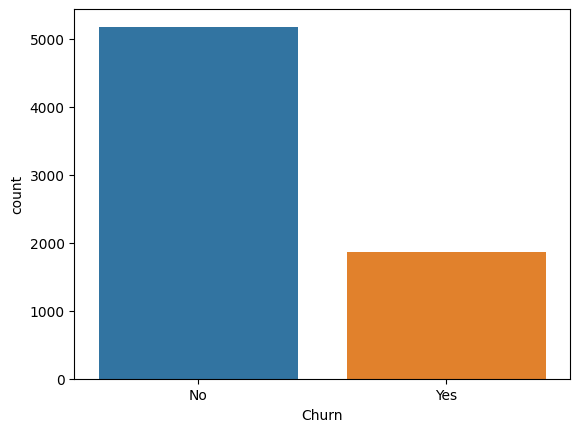

<Figure size 640x480 with 0 Axes>

In [127]:
sns.countplot(x='Churn',data=telco_data)
plt.show()
plt.savefig("images\churn.png")

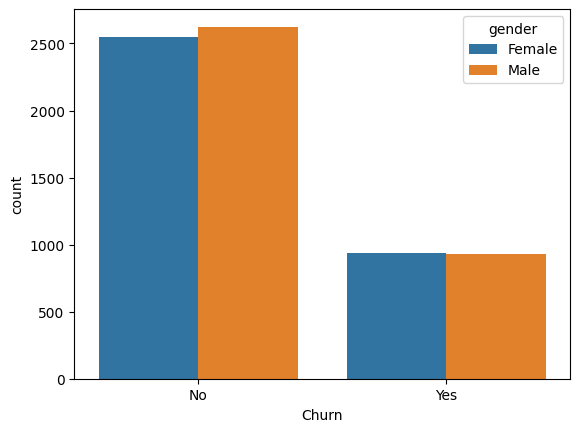

<Figure size 640x480 with 0 Axes>

In [128]:
sns.countplot(x='Churn',hue='gender',data=telco_data)
plt.show()
plt.savefig("images\churn_genderlot.png")